<a href="https://colab.research.google.com/github/surekavin/ecommerce-ship/blob/main/ecom_ship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
rcParams["figure.figsize"]=(20,8)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.describe()


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.isna().sum()


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Data Preparing

In [6]:
df=df.drop("ID",axis=1 )


In [7]:
Warehouse_block = df["Warehouse_block"].value_counts()
Warehouse_block

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

In [8]:
df["Reached.on.Time_Y.N"].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [9]:
df.columns


Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [10]:
catogary_1= ['Warehouse_block', 'Mode_of_Shipment','Customer_rating','Prior_purchases',
       'Product_importance', 'Gender','Reached.on.Time_Y.N']
catogary_2 =['Discount_offered', 'Weight_in_gms']
catogary_3 =['Discount_offered', 'Weight_in_gms','Cost_of_the_Product','Reached.on.Time_Y.N']

Data visualization

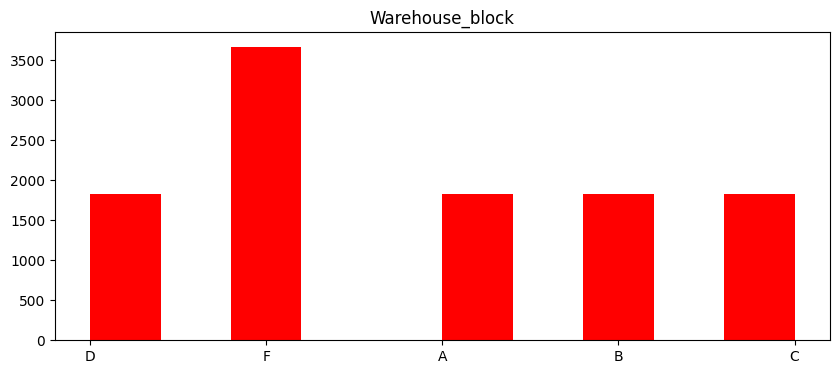

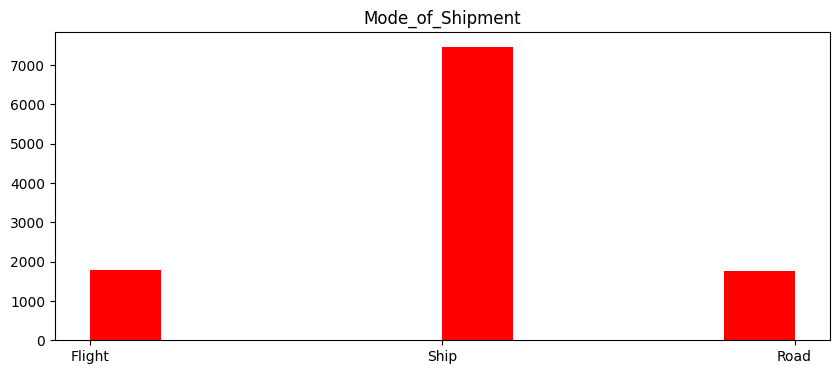

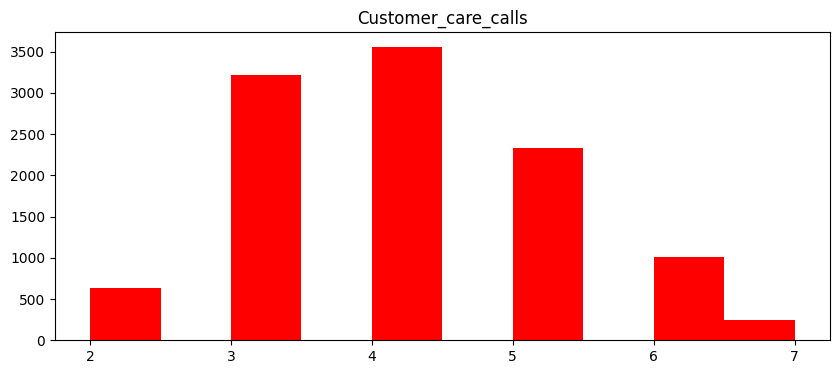

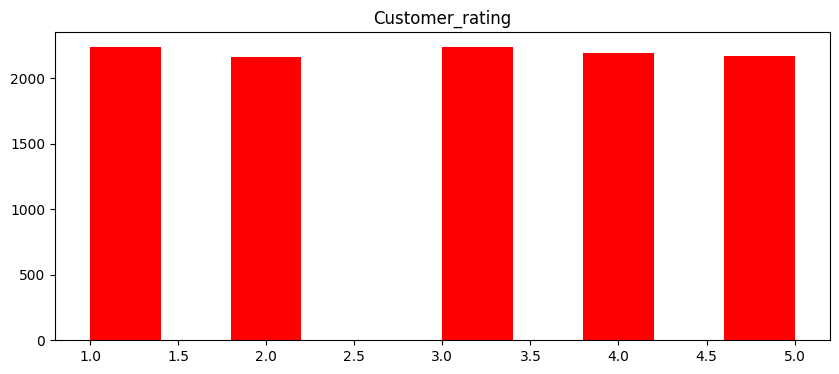

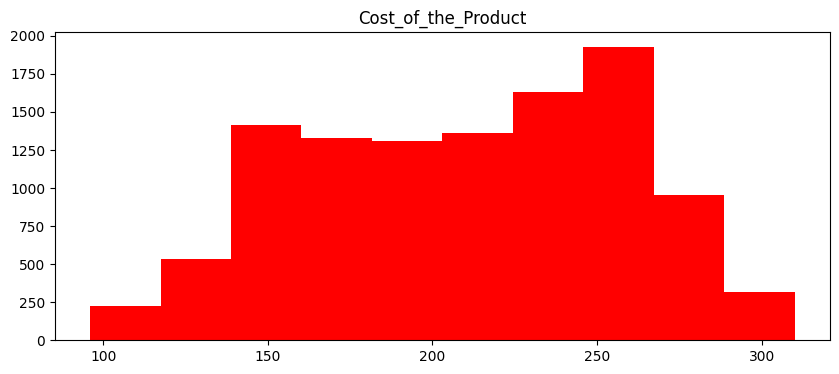

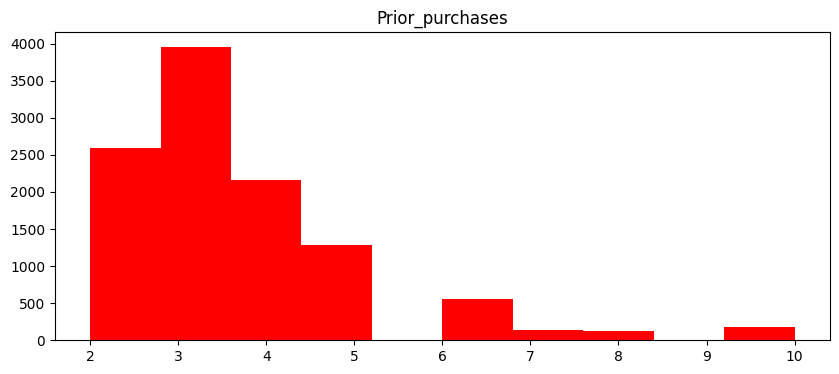

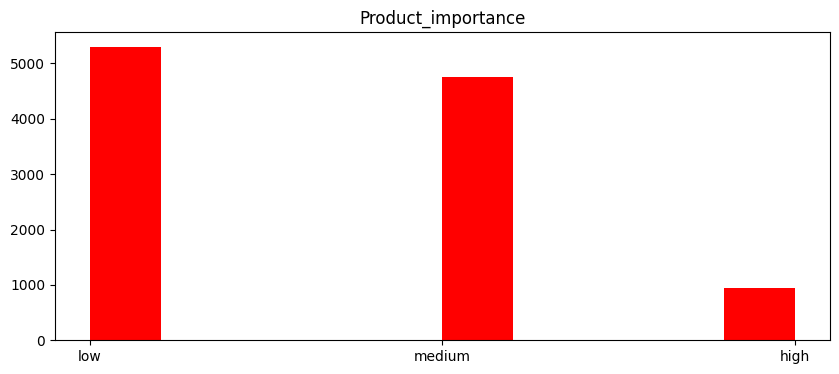

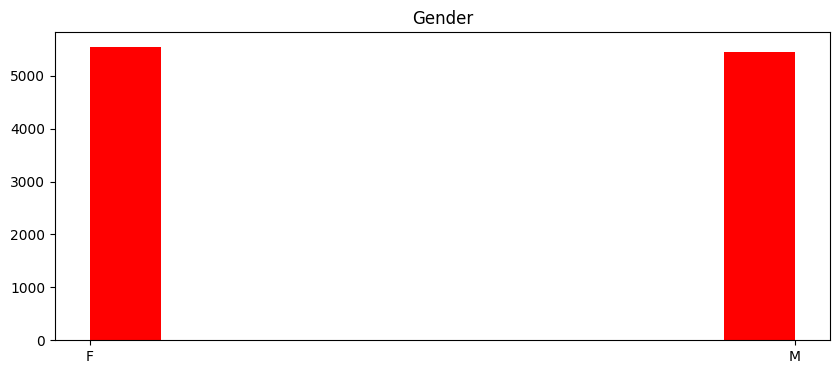

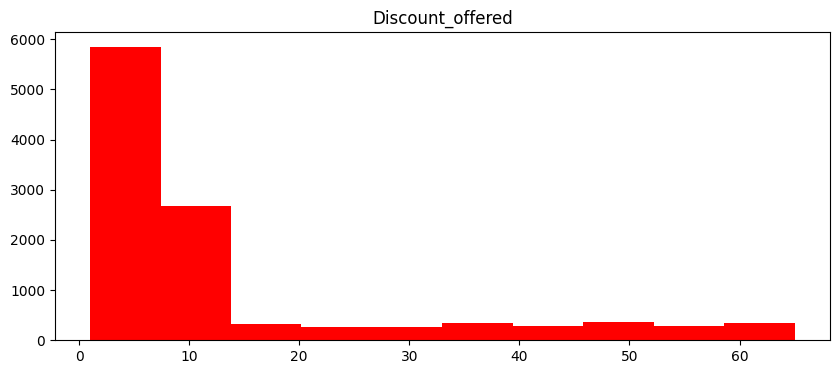

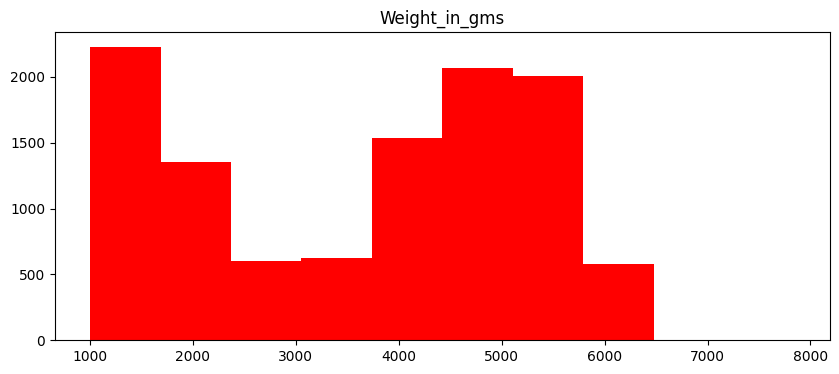

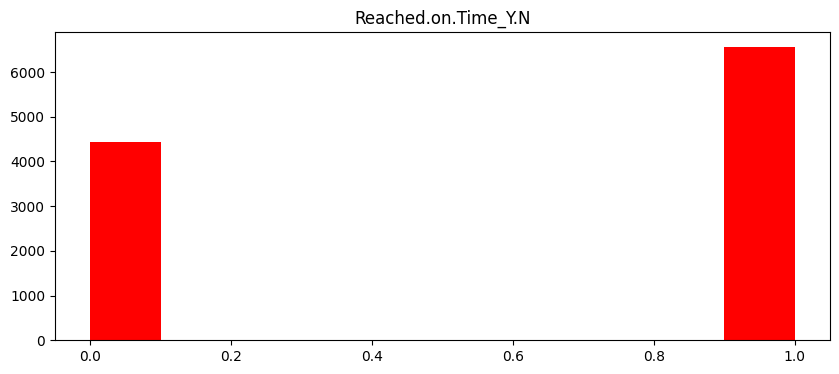

In [11]:
for i in df.columns :
    plt.figure(figsize=(10, 4))
    plt.title(i)
    plt.hist(df[i],color="red")
    plt.show()

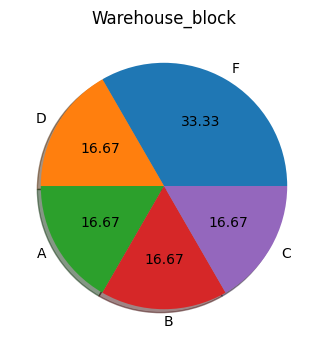

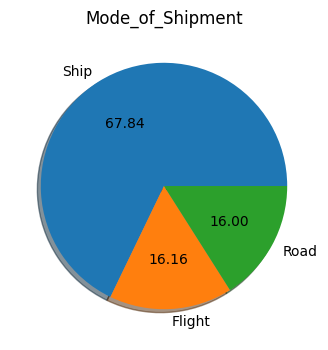

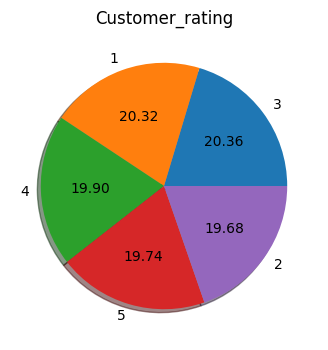

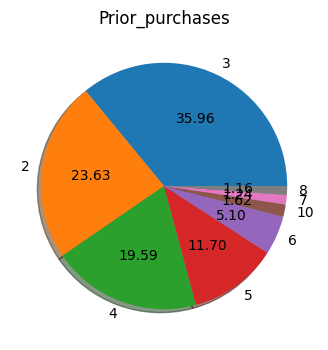

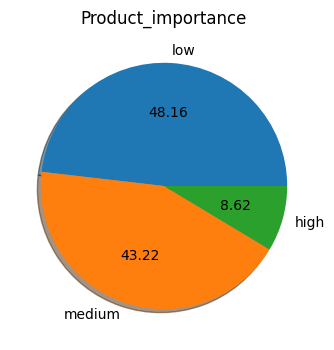

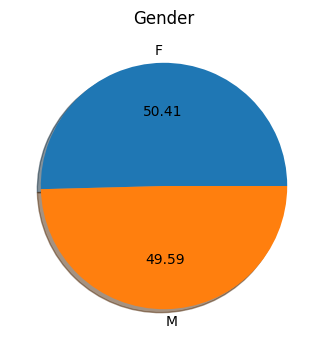

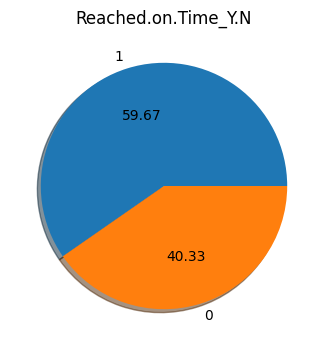

In [12]:
for i in catogary_1 :
    x=df[i].value_counts()
    y= x.index
    plt.figure(figsize=(10, 4))
    plt.title(i)
    plt.pie(x,labels=y
       ,shadow=True
       ,autopct="%.2F")
    plt.show()

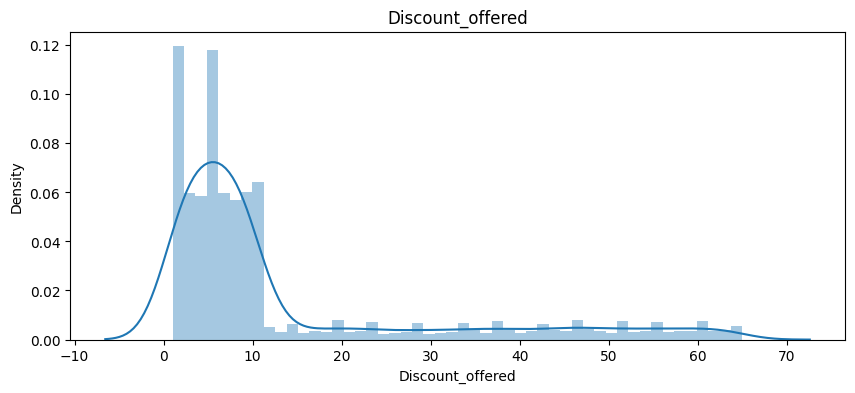

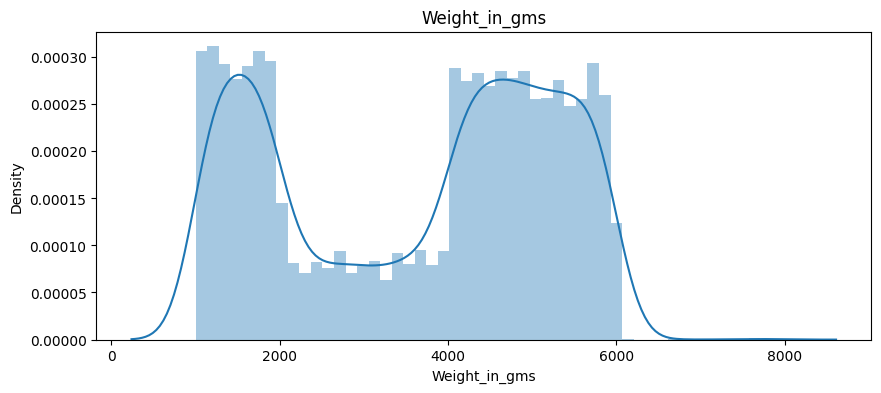

In [13]:
for i in catogary_2:
    plt.figure(figsize=(10, 4))
    plt.title(i)
    x=sns.distplot(df[i],kde=True, bins = 50)
    plt.show()

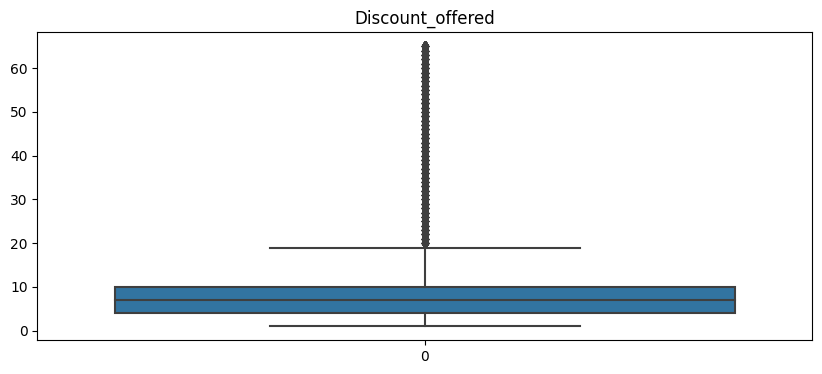

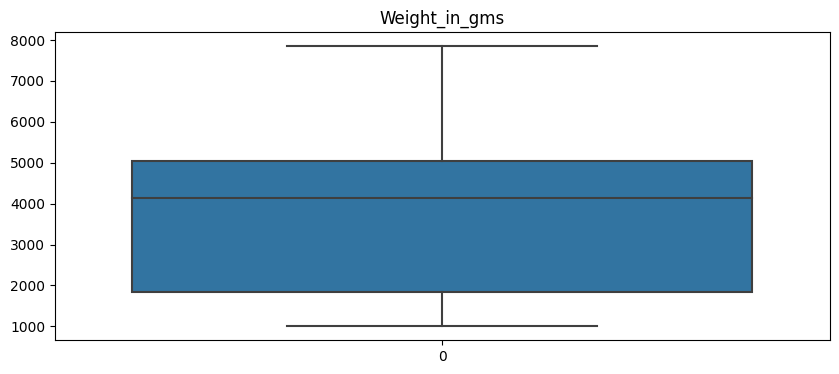

In [14]:
for i in catogary_2:
    plt.figure(figsize=(10, 4))
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

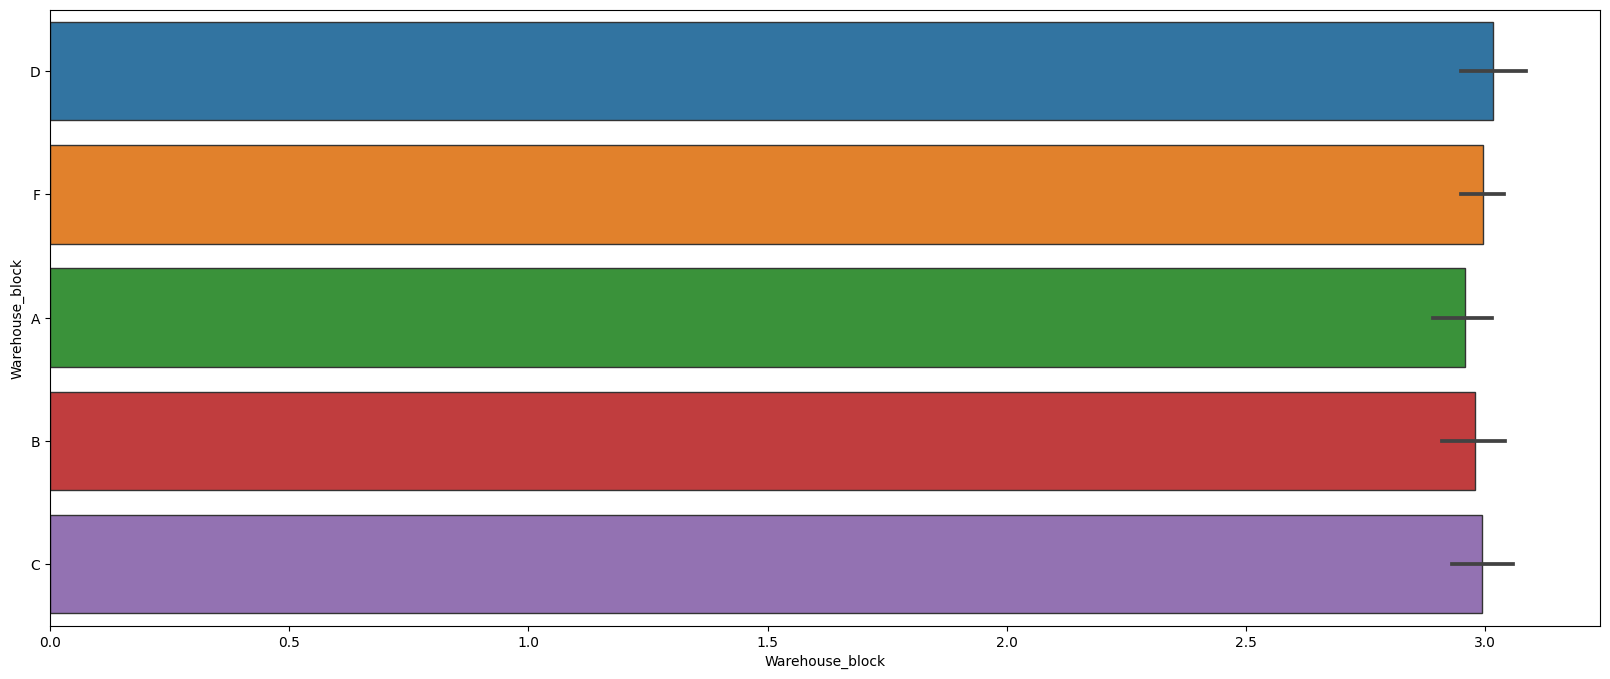

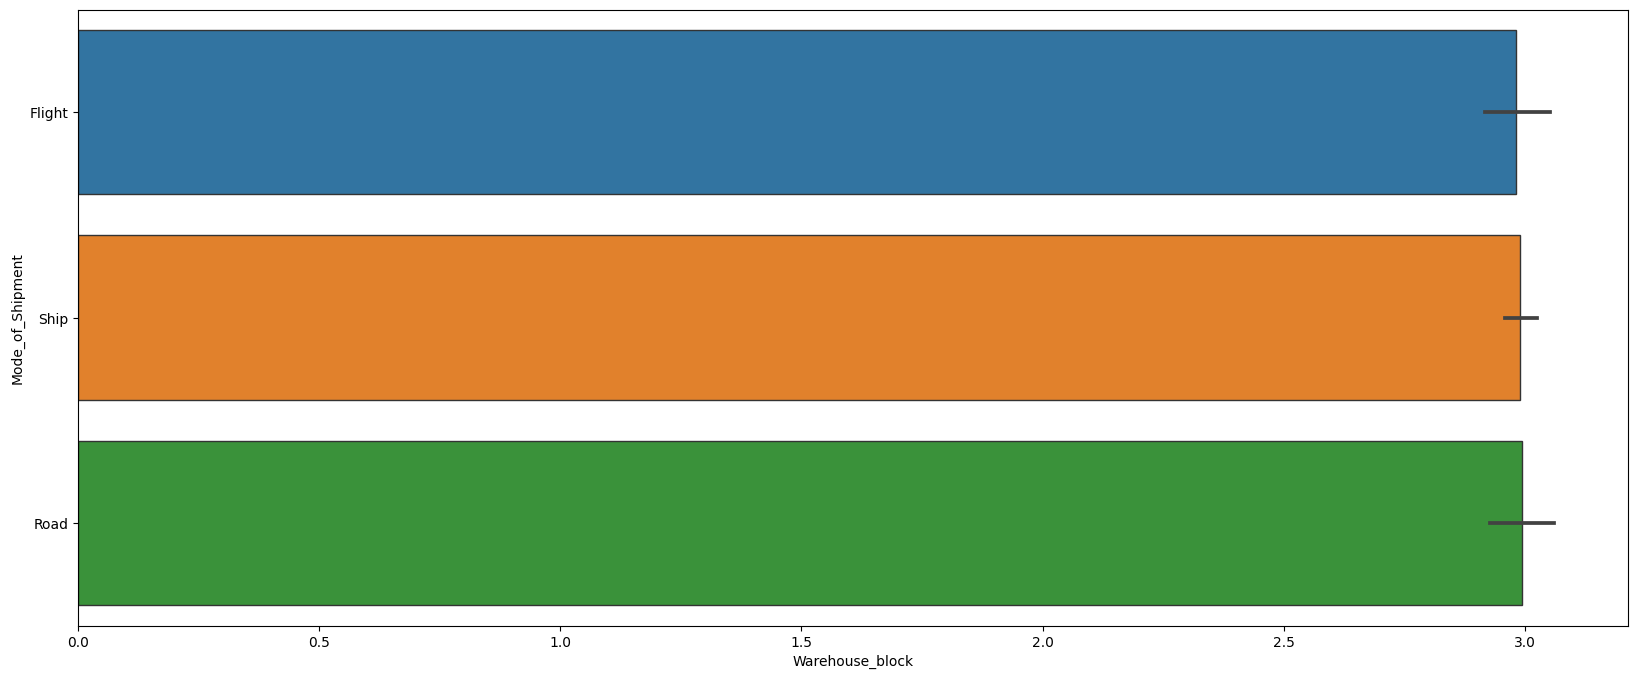

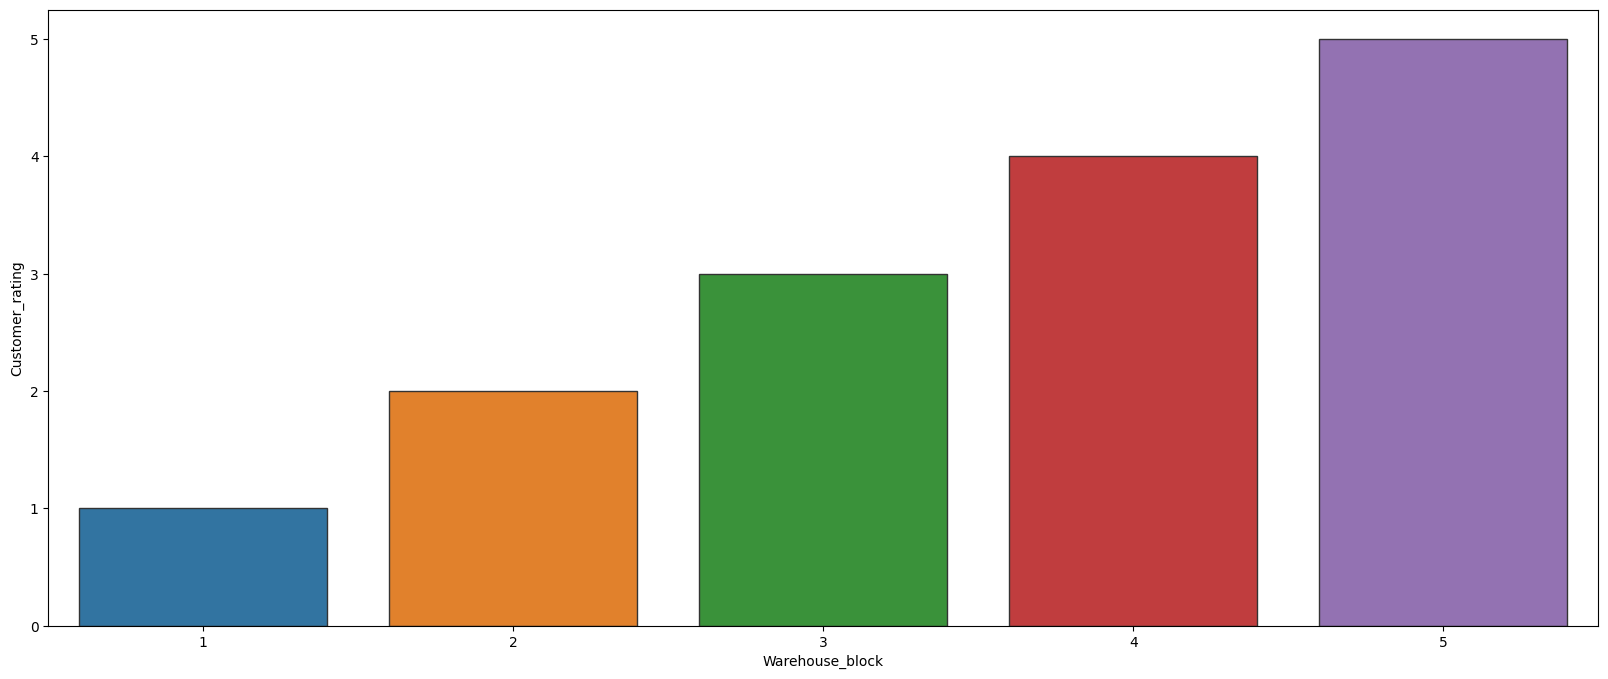

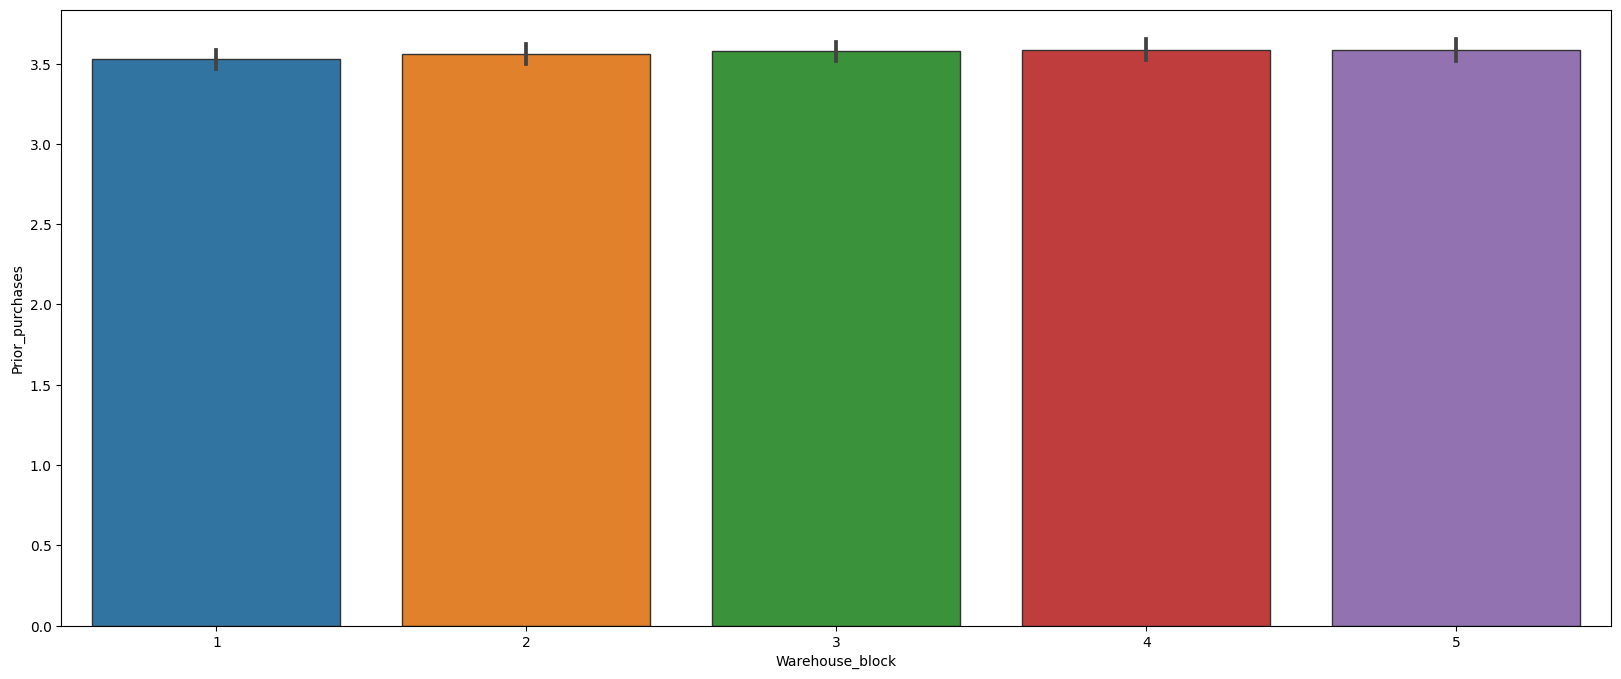

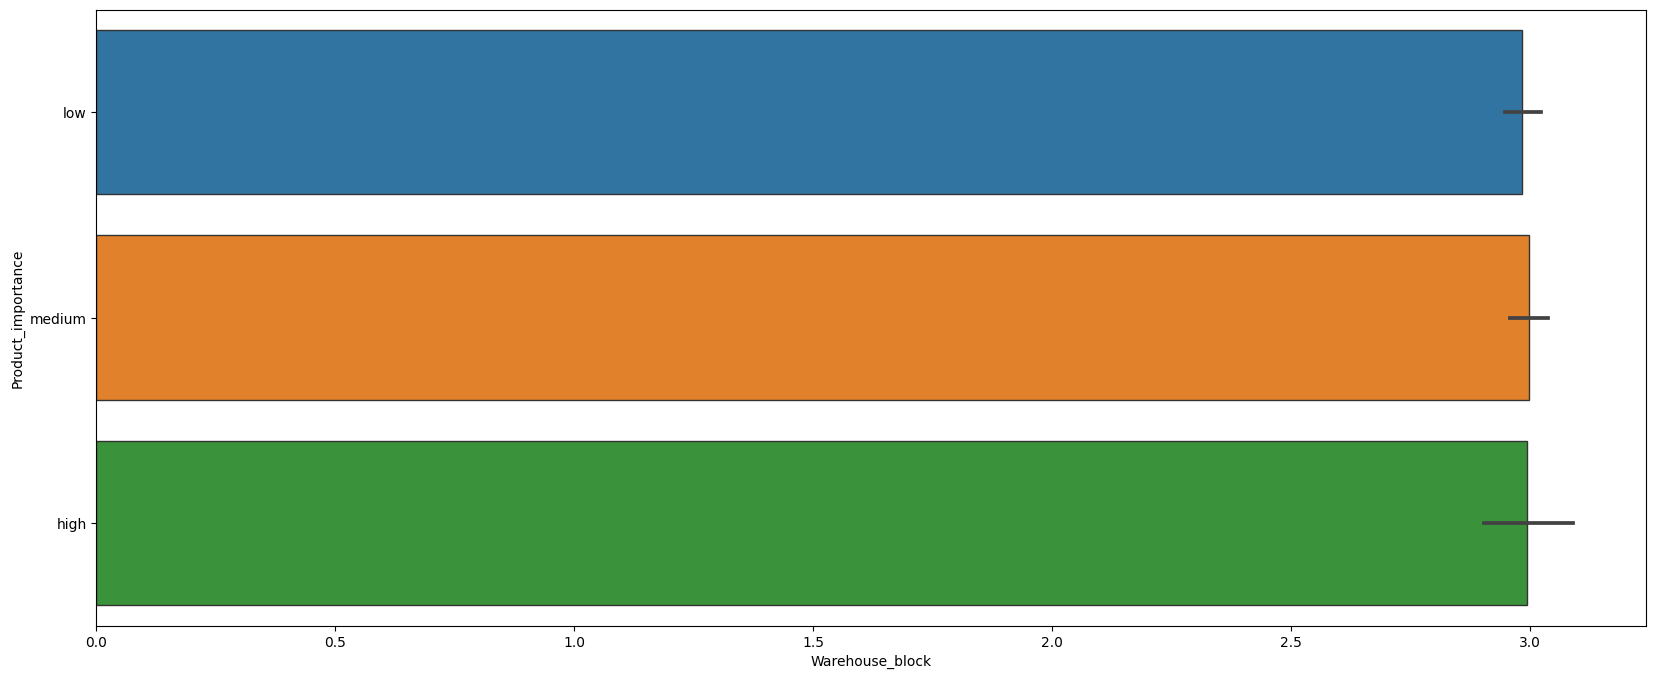

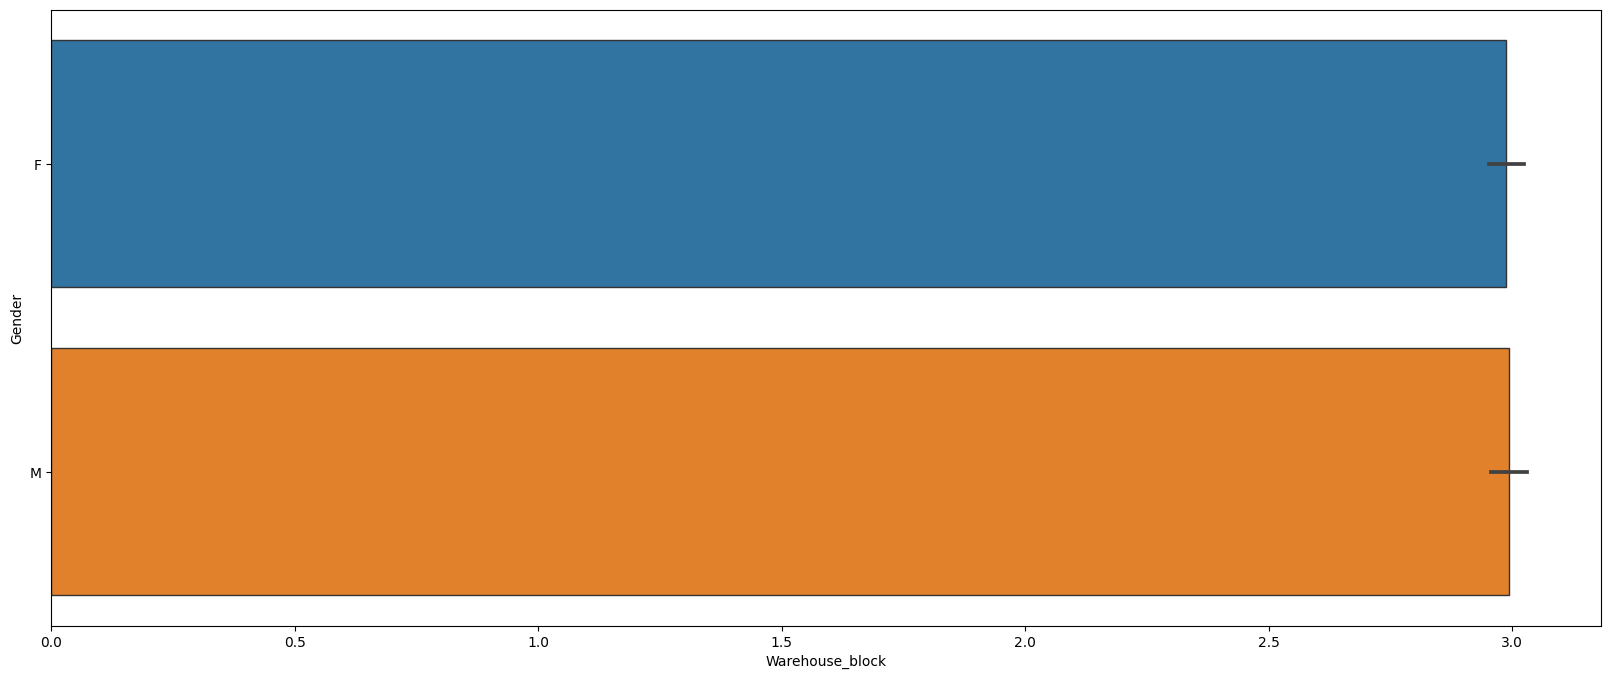

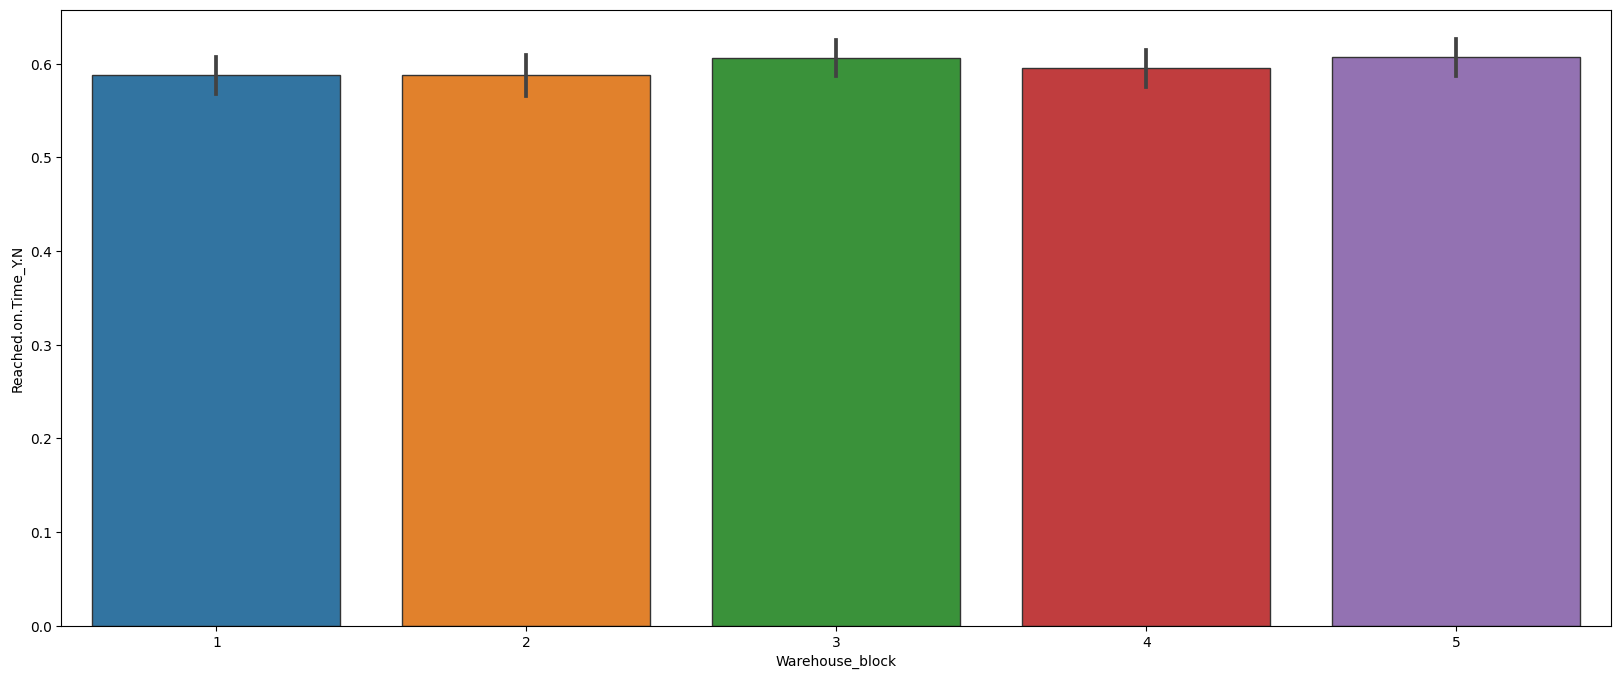

In [15]:
for i in catogary_1:
    sns.barplot(x=df["Customer_rating"] ,y= df[i], edgecolor='.2')
    plt.xlabel("Warehouse_block")
    plt.ylabel(i)
    plt.show()

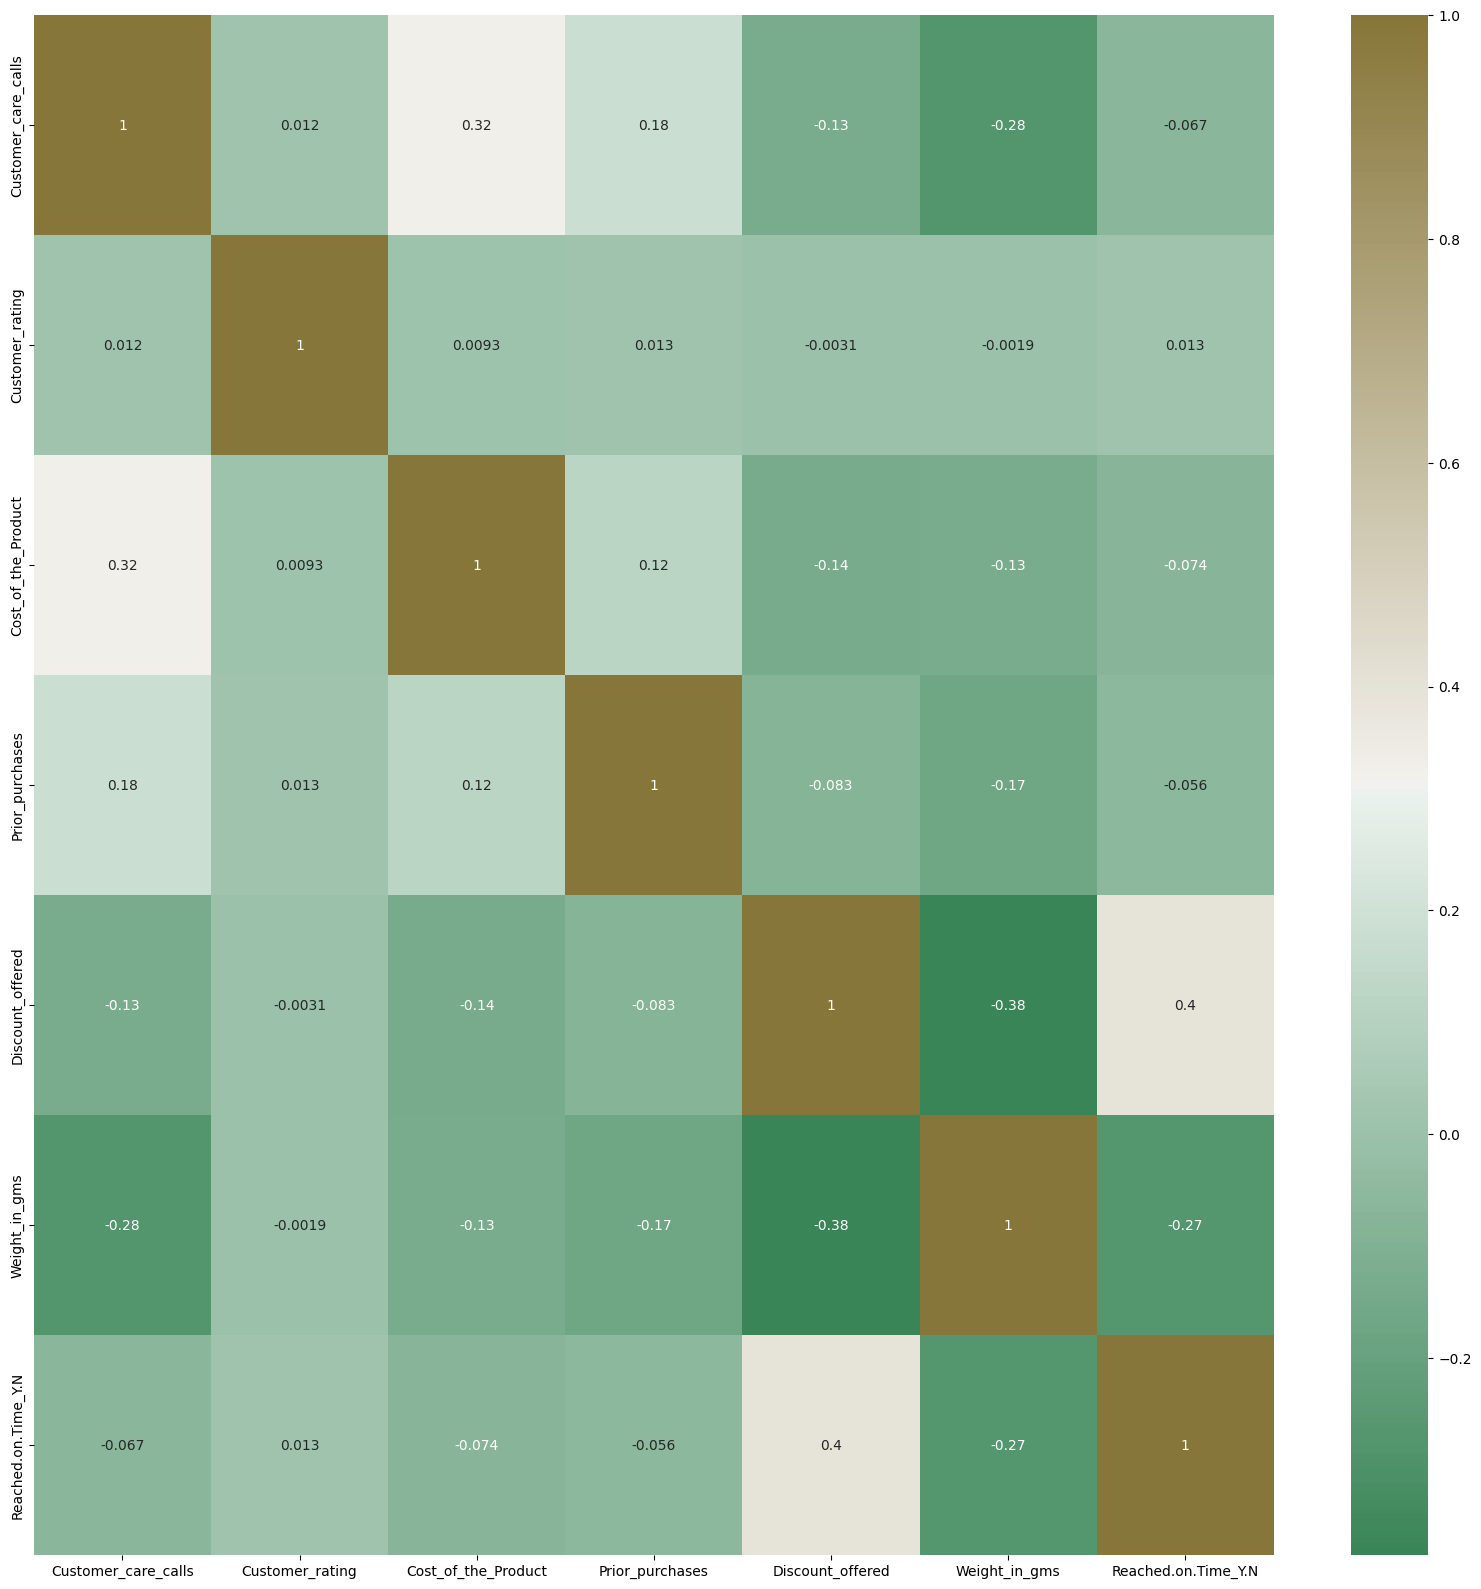

In [16]:
color  = sns.diverging_palette(500, 70, as_cmap=True)
fig, ax = plt.subplots(figsize=(20,20))
dataplot=sns.heatmap(df.corr() , cmap = color , annot=True)
plt.show()

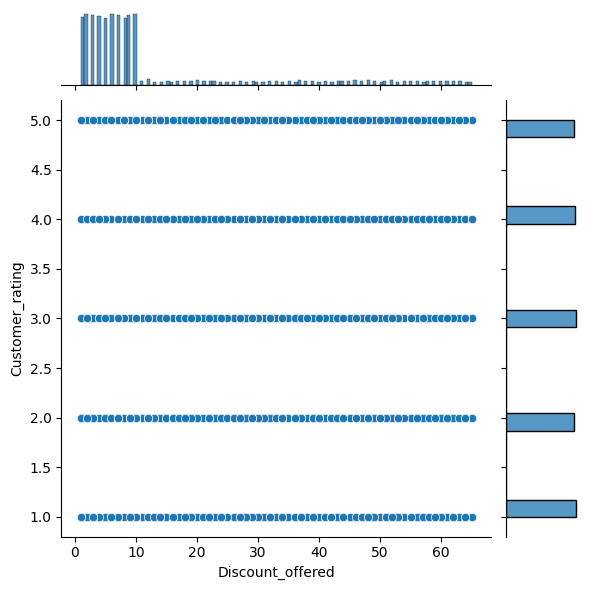

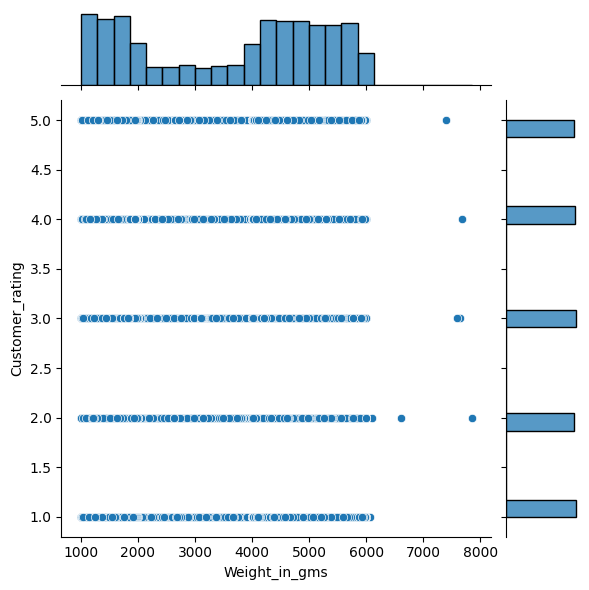

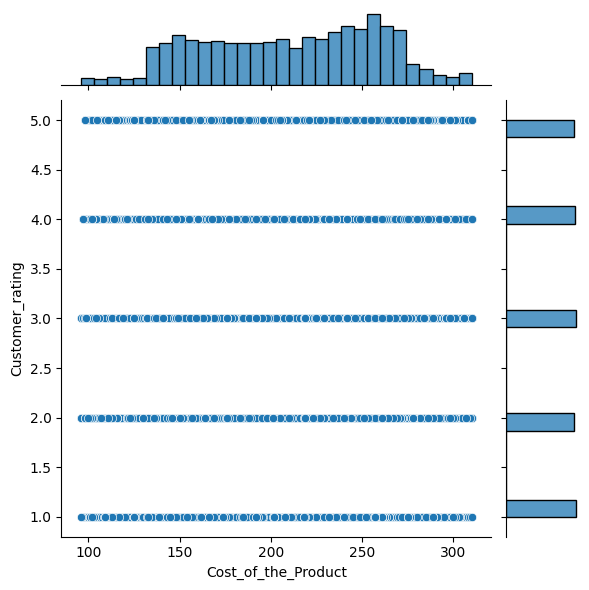

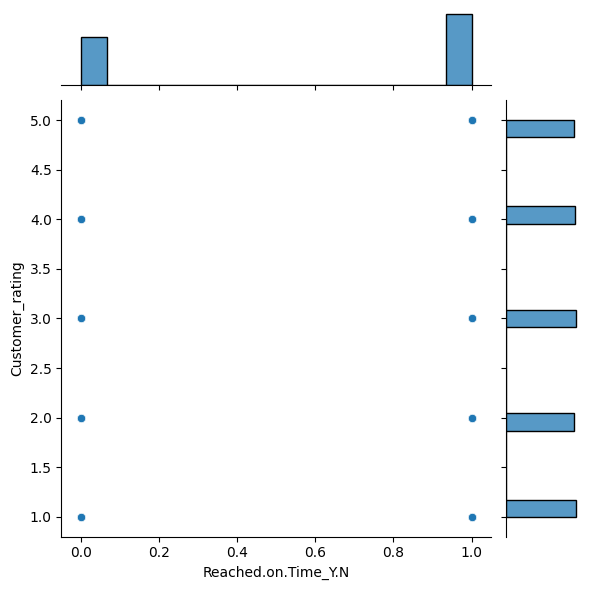

In [17]:
for i in catogary_3 :
    sns.jointplot(x=i ,y='Customer_rating',data=df)

Data Preparing

In [18]:
df.columns


Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [19]:
x=df.drop("Reached.on.Time_Y.N",axis=1)
x.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,D,Flight,4,2,177,3,low,F,44,1233
1,F,Flight,4,5,216,2,low,M,59,3088
2,A,Flight,2,2,183,4,low,M,48,3374
3,B,Flight,3,3,176,4,medium,M,10,1177
4,C,Flight,2,2,184,3,medium,F,46,2484


In [20]:
y=df["Reached.on.Time_Y.N"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
catogary =['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
one_hot=OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,catogary)],remainder="passthrough")
transformed_x = transformer.fit_transform(x)
features = pd.DataFrame(transformed_x)
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,2.0,177.0,3.0,44.0,1233.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0,216.0,2.0,59.0,3088.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,183.0,4.0,48.0,3374.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,176.0,4.0,10.0,1177.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,184.0,3.0,46.0,2484.0


Data spliting

In [22]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test = train_test_split(features,y,test_size=0.2,shuffle=True)

In [23]:
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape

((8799, 19), (2200, 19), (8799,), (2200,))

Random Forest Model

In [24]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(n_jobs=-1)
Search_cv =RandomizedSearchCV(estimator=model
                             ,param_distributions=grid
                             ,n_iter=10
                             ,cv=5
                             ,verbose=2)
Search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [25]:
Search_cv.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [26]:
from sklearn.ensemble import RandomForestClassifier
Random = RandomForestClassifier( n_estimators = 500,
 min_samples_split = 4,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth = 10).fit(x_train,y_train)

In [27]:
Random.score(x_test,y_test)

0.6681818181818182

In [28]:
y_predict_Random = Random.predict(x_test)
y_predict_Random

array([1, 1, 0, ..., 0, 0, 1])

In [29]:
y_test= np.array(y_test)

In [30]:
compare_rf = pd.DataFrame(data=[y_test,y_predict_Random])
compare_rf

,0,1,2,3,4,5,6,7,8,9,...,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199
0,1,1,1,0,0,1,0,0,1,1,...,1,0,0,0,0,1,1,0,1,1
1,1,1,0,0,0,1,0,0,1,1,...,1,0,0,0,0,0,1,0,0,1


In [31]:
compare_rf =compare_rf.transpose()

In [32]:
compare_rf.rename(columns = {0:'Real',1:'predict'}, inplace = True)

In [33]:
compare_rf


,Real,predict
0,1,1
1,1,1
2,1,0
3,0,0
4,0,0
...,...,...
2195,1,0
2196,1,1
2197,0,0
2198,1,0


In [34]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators= i).fit(x_train,y_train)
    print(f"Model accruacy on test set: {model.score(x_test, y_test)}")
    print(f"Cross-validation score: {np.mean(cross_val_score(model,features, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accruacy on test set: 0.6540909090909091
Cross-validation score: 63.24029930960353%

Trying model with 20 estimators...
Model accruacy on test set: 0.6618181818181819
Cross-validation score: 61.30404729422465%

Trying model with 30 estimators...
Model accruacy on test set: 0.6531818181818182
Cross-validation score: 61.42207615031625%

Trying model with 40 estimators...
Model accruacy on test set: 0.6654545454545454
Cross-validation score: 60.71298110711481%

Trying model with 50 estimators...
Model accruacy on test set: 0.6640909090909091
Cross-validation score: 60.87664227541445%

Trying model with 60 estimators...
Model accruacy on test set: 0.6654545454545454
Cross-validation score: 61.149328207036255%

Trying model with 70 estimators...
Model accruacy on test set: 0.6672727272727272
Cross-validation score: 60.78575385505809%

Trying model with 80 estimators...
Model accruacy on test set: 0.6572727272727272
Cross-validation score: 60.63119186

In [35]:
NUM=[]
MM=[]
MMM=[]
import matplotlib.pyplot as plt
import numpy as np
for a in range (10 ,200 ,3):
    Random_Force_regressor=RandomForestClassifier(
        n_estimators= a , max_depth=5 , n_jobs=-1 )
    Random_Force_regressor.fit(x_train , y_train)
    y_pred=Random_Force_regressor.predict(x_test)
    TES=Random_Force_regressor.score(x_test , y_test)
    score=Random_Force_regressor.score(x_train , y_train)
    MMM.append(TES)
    MM.append(score)
    NUM.append(a)

KNeighborsClassifier

In [36]:
# tunning parameters in knn calssification
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_neighbors": [1,2,3,4,5,6,8,9,10],
        "weights": ['uniform', 'distance'],
        "p": [1, 2],
        "algorithm":  ['auto', 'ball_tree', 'kd_tree', 'brute'],
        "leaf_size": [15, 20,30]}
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_jobs=-1)
search_cv =RandomizedSearchCV(estimator=model
                             ,param_distributions=grid
                             ,n_iter=20
                             ,cv=5
                             ,verbose=2)
search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END algorithm=auto, leaf_size=15, n_neighbors=2, p=1, weights=uniform; total time=   0.5s
[CV] END algorithm=auto, leaf_size=15, n_neighbors=2, p=1, weights=uniform; total time=   0.7s
[CV] END algorithm=auto, leaf_size=15, n_neighbors=2, p=1, weights=uniform; total time=   0.8s
[CV] END algorithm=auto, leaf_size=15, n_neighbors=2, p=1, weights=uniform; total time=   0.8s
[CV] END algorithm=auto, leaf_size=15, n_neighbors=2, p=1, weights=uniform; total time=   0.8s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weigh

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_iter=20,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [15, 20, 30],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 8, 9,
                                                        10],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [37]:
search_cv.best_params_

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 6,
 'leaf_size': 30,
 'algorithm': 'brute'}

In [38]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(weights = 'uniform',
 p = 2,
 n_neighbors = 4,
 leaf_size = 30,
 algorithm = 'ball_tree').fit(x_train,y_train)

In [39]:
KNN.score(x_test,y_test)

0.6659090909090909

In [40]:
y_predict_knn = KNN.predict(x_test)
y_predict_knn

array([1, 1, 0, ..., 1, 0, 1])

In [41]:
y_test= np.array(y_test)

In [42]:
compare_knn = pd.DataFrame(data=[y_test,y_predict_knn])
compare_knn

,0,1,2,3,4,5,6,7,8,9,...,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199
0,1,1,1,0,0,1,0,0,1,1,...,1,0,0,0,0,1,1,0,1,1
1,1,1,0,0,1,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1


In [43]:
compare_knn =compare_knn.transpose()

In [44]:
compare_knn.rename(columns = {0:'Real',1:'predict'}, inplace = True)

In [45]:
compare_knn


,Real,predict
0,1,1
1,1,1
2,1,0
3,0,0
4,0,1
...,...,...
2195,1,0
2196,1,0
2197,0,1
2198,1,0


Clustring(K_Mean)

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,init='k-means++',
    tol=0.001).fit(x_train)

clus=kmeans.predict(x_test)
clus

array([0, 1, 0, ..., 1, 0, 1], dtype=int32)

In [47]:
compare_k_mean = pd.DataFrame(data=[y_test,clus])
compare_k_mean

,0,1,2,3,4,5,6,7,8,9,...,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199
0,1,1,1,0,0,1,0,0,1,1,...,1,0,0,0,0,1,1,0,1,1
1,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,1


In [48]:
compare_K_mean =compare_k_mean.transpose()

In [49]:
compare_K_mean.rename(columns = {0:'Real',1:'predict'}, inplace = True)

In [50]:
compare_K_mean

,Real,predict
0,1,0
1,1,1
2,1,0
3,0,0
4,0,1
...,...,...
2195,1,0
2196,1,1
2197,0,1
2198,1,0


In [51]:
np.mean(y_test==clus)

0.6136363636363636

Classification Matrix

In [52]:
def classification_matrix(y_true, y_preds, module,x,y):
    from sklearn.metrics import accuracy_score , precision_score ,recall_score,ConfusionMatrixDisplay,f1_score,classification_report
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print("____________________________________________________________")
    print("___accuracy_score , precision_score ,recall_score,f1_score__")
    print("____________________________________________________________")
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}" )
    print("____________________________________________________________")
    print("_____________________Classification Report__________________")
    print("____________________________________________________________")
    print(classification_report(y_true,y_preds))
    print("______________________________________________________________")
    print("_____________________Confusion Matrix_________________________")
    print("______________________________________________________________")
    ConfusionMatrixDisplay.from_estimator(estimator = Search_cv , X=x ,y=y)


Random Forest Model


____________________________________________________________
___accuracy_score , precision_score ,recall_score,f1_score__
____________________________________________________________
Acc: 66.82%
Precision: 0.88
Recall: 0.53
F1 score: 0.66
____________________________________________________________
_____________________Classification Report__________________
____________________________________________________________
              precision    recall  f1-score   support

           0       0.55      0.88      0.68       858
           1       0.88      0.53      0.66      1342

    accuracy                           0.67      2200
   macro avg       0.71      0.71      0.67      2200
weighted avg       0.75      0.67      0.67      2200

______________________________________________________________
_____________________Confusion Matrix_________________________
______________________________________________________________


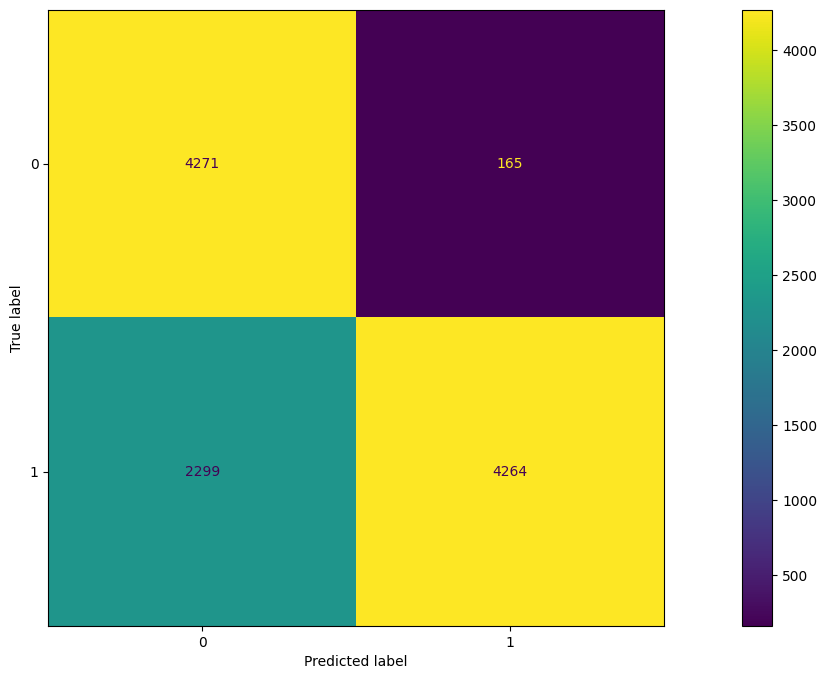

In [53]:
classification_matrix(y_test,y_predict_Random,Random ,features ,y)


kNN Model

____________________________________________________________
___accuracy_score , precision_score ,recall_score,f1_score__
____________________________________________________________
Acc: 66.59%
Precision: 0.82
Recall: 0.58
F1 score: 0.68
____________________________________________________________
_____________________Classification Report__________________
____________________________________________________________
              precision    recall  f1-score   support

           0       0.55      0.79      0.65       858
           1       0.82      0.58      0.68      1342

    accuracy                           0.67      2200
   macro avg       0.68      0.69      0.67      2200
weighted avg       0.71      0.67      0.67      2200

______________________________________________________________
_____________________Confusion Matrix_________________________
______________________________________________________________


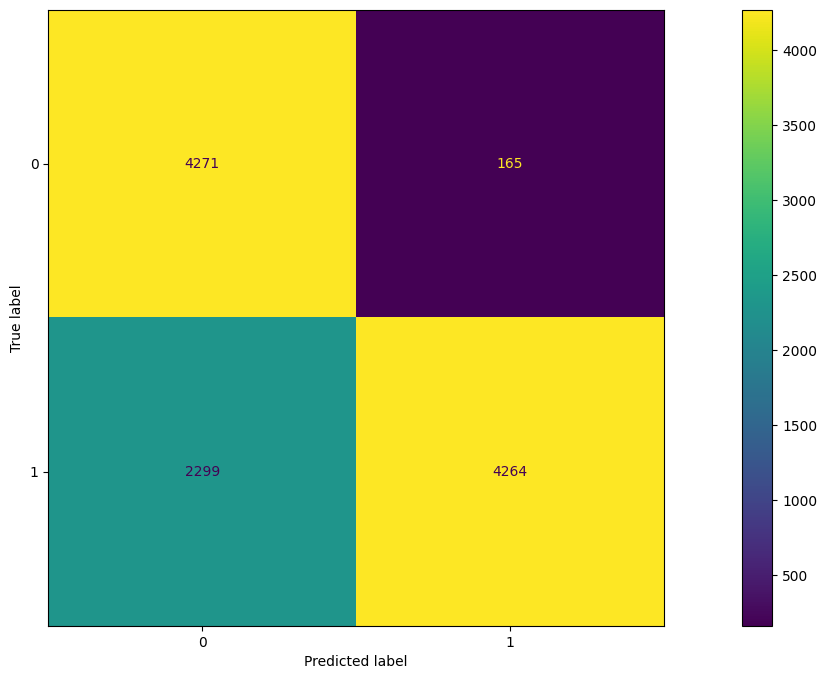

In [54]:
classification_matrix(y_test,y_predict_knn,KNN ,features ,y)